# Прогнозирование оттока клиентов

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Необходимо построить модель с предельно большим значением *F1*-меры.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

### Описание данных
Признаки:<ul>
    <li>RowNumber — индекс строки в данных</li>
    <li>CustomerId — уникальный идентификатор клиента</li>
    <li>Surname — фамилия</li>
    <li>CreditScore — кредитный рейтинг</li>
    <li>Geography — страна проживания</li>
    <li>Gender — пол</li>
    <li>Age — возраст</li>
    <li>Tenure — количество недвижимости у клиента</li>
    <li>Balance — баланс на счёте</li>
    <li>NumOfProducts — количество продуктов банка, используемых клиентом</li>
    <li>HasCrCard — наличие кредитной карты</li>
    <li>IsActiveMember — активность клиента</li>
    <li>EstimatedSalary — предполагаемая зарплата</li></ul>

### План работы:
<a href='#step_1'>Шаг 1. Получение общей информации и подготвка данных.</a><br>
На первом этапе импортируем необходимые библиотеки и читаем файл, знакомимся с общей информацией, выставляем необходимые типы данных, заполняем пропуски.<br>
<a href='#step_2'>Шаг 2. Разбиение данных и обучение моделей без учета дисбаланса.</a><br>
На втором шаге разбиваем данные на выборки, обучаем модели без учета дисбаланса.<br>
<a href='#step_3'>Шаг 3. Обучение и проверка моделей с учетом дисбаланса.</a><br>
Исправляем дисбаланс классов разными методами.<br>
<a href='#step_4'>Шаг 4. Проверка моделей на тестовой выборке.</a><br>
Проверяем модели на тестовых данных.<br>

# 1. Подготовка данных

<a id = "step_1"></a>

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from tqdm import tqdm
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('/datasets/Churn.csv', index_col = 0)
data.info()
display(data.describe())
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(7), object(3)
memory usage: 1.1+ MB


,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Количество недвижимости нужно перевести в int, баланс с зарплатой тоже.<br>
Столбец с полом перекодировать с помощью OHE, также geography.<br>
Перевести столбцы в нижний регистр.<br>
Исследовать пропуски в Tenure.

In [3]:
data.columns = data.columns.str.lower()

In [4]:
data[['tenure', 'balance', 'estimatedsalary']] = data[['tenure', 'balance', 'estimatedsalary']].round().astype('Int64')

In [5]:
data = pd.get_dummies(data, drop_first = True)

gender: 0- female, 1 - male

In [6]:
data

,customerid,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,...,surname_Zotova,surname_Zox,surname_Zubarev,surname_Zubareva,surname_Zuev,surname_Zuyev,surname_Zuyeva,geography_Germany,geography_Spain,gender_Male
RowNumber,,,,,,,,,,,,,,,,,,,,,
1,15634602,619,42,2,0,1,1,1,101349,1,...,0,0,0,0,0,0,0,0,0,0
2,15647311,608,41,1,83808,1,0,1,112543,0,...,0,0,0,0,0,0,0,0,1,0
3,15619304,502,42,8,159661,3,1,0,113932,1,...,0,0,0,0,0,0,0,0,0,0
4,15701354,699,39,1,0,2,0,0,93827,0,...,0,0,0,0,0,0,0,0,0,0
5,15737888,850,43,2,125511,1,1,1,79084,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,771,39,5,0,2,1,0,96271,0,...,0,0,0,0,0,0,0,0,0,1
9997,15569892,516,35,10,57370,1,1,1,101700,0,...,0,0,0,0,0,0,0,0,0,1
9998,15584532,709,36,7,0,1,0,1,42086,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
data.drop(['customerid'], axis = 1).duplicated().sum()

0

Повторов клиентов нет.

Предположим, что пропуски в кол-ве недвижимости это отсутствие недвижимости у клиентов. Сравним распределения по скору и заработку, чтобы убедиться, что группы со значениями 0 и NaN в 'tenure' похожи.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb172518fd0>,
      dtype=object)

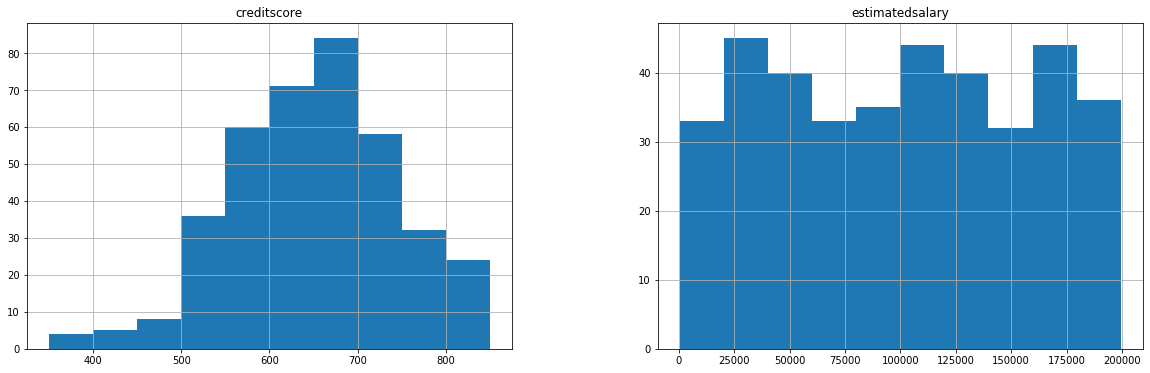

In [8]:
data[data['tenure'] == 0][['creditscore', 'estimatedsalary']].hist(figsize = (20,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb16aacddd0>,
      dtype=object)

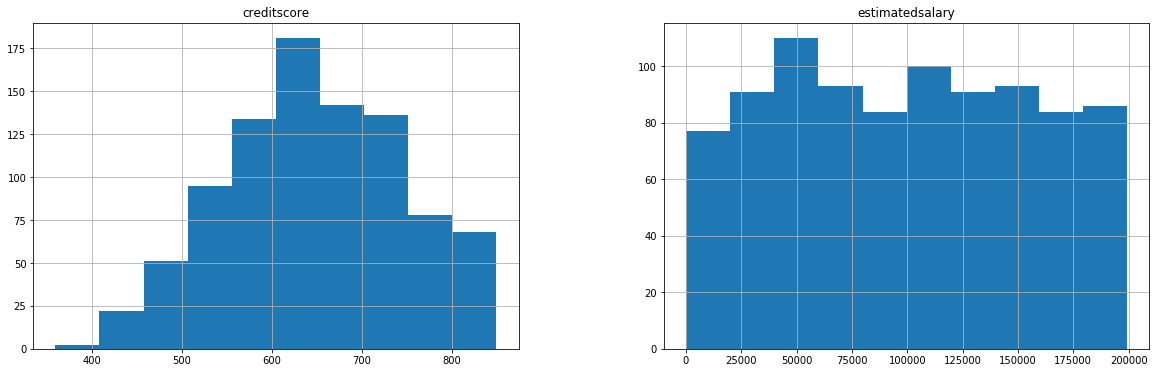

In [9]:
data[data['tenure'].isna()][['creditscore', 'estimatedsalary']].hist(figsize = (20,6))

In [10]:
print(len(data[data['tenure'] == 0]), len(data[data['tenure'].isna()]))

382 909


Распределения похожи, если учесть разный объем выборок.<br>
заполним пропуски нулями.

In [11]:
data['tenure'] = data['tenure'].fillna(0)

In [12]:
data.isna().sum()

customerid           0
creditscore          0
age                  0
tenure               0
balance              0
                    ..
surname_Zuyev        0
surname_Zuyeva       0
geography_Germany    0
geography_Spain      0
gender_Male          0
Length: 2944, dtype: int64

# 2. Исследование задачи

<a href='#step_1'>Шаг 1. Получение общей информации и подготвка данных.</a><br>
<a href='#step_2'>Шаг 2. Разбиение данных и обучение моделей без учета дисбаланса.</a><br>
<a href='#step_3'>Шаг 3. Обучение и проверка моделей с учетом дисбаланса.</a><br>
<a href='#step_4'>Шаг 4. Проверка моделей на тестовой выборке.</a><br>

<a id = "step_2"></a>

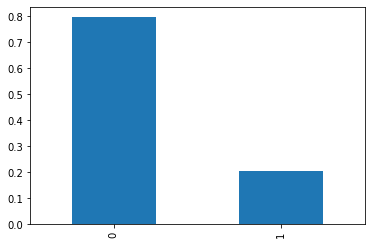

In [13]:
data['exited'].value_counts(normalize = 'balanced').plot(kind = 'bar')

Наблюдается сильный дисбаланс классов.

Для обучения неважна фамилия клиента - уберем её из таблицы и произведем масштабирование числовых данных.

In [14]:
features = data.drop(['exited'], axis = 1)
target = data['exited']

features_train, features_other, target_train, target_other = train_test_split(
    features, target, test_size = 0.4, stratify = target, random_state = 42)

features_valid, features_test, target_valid, target_test = train_test_split(
    features_other, target_other, test_size = 0.5, stratify = target_other, random_state = 42)

для несбалансированных данных используется stratify в train_test_split

In [15]:
print('shape features_train =',features_train.shape, 'shape target_train = ', target_train.shape)
print('shape features_valid =',features_valid.shape, 'shape target_valid = ', target_valid.shape)
print('shape features_test =', features_test.shape , 'shape target_test = ', target_test.shape)

shape features_train = (6000, 2943) shape target_train =  (6000,)
shape features_valid = (2000, 2943) shape target_valid =  (2000,)
shape features_test = (2000, 2943) shape target_test =  (2000,)


In [16]:
scaler = StandardScaler()
numeric = [\
'creditscore', 'age', 'tenure', \
'balance', 'numofproducts', 'estimatedsalary', 'hascrcard']
scaler.fit(features_train[numeric])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [17]:
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])

In [18]:
best_score_tree = 0
best_score_forest = 0
best_estimators = 0

for depth in tqdm(range(10,20)):
    
    model_tree = DecisionTreeClassifier(max_depth = depth, random_state = 42)
    model_tree.fit(features_train, target_train)
    result_tree = model_tree.predict(features_valid)    
    score_tree = f1_score(target_valid, result_tree)
    if score_tree > best_score_tree:
        best_score_tree = score_tree
        best_model_tree = model_tree
        best_depth_tree = depth

    for estimators in range(1,201,10):
        model_forest = RandomForestClassifier(n_estimators = estimators, max_depth = depth, random_state = 42)
        model_forest.fit(features_train, target_train)
        result_forest = model_forest.predict(features_valid)
        score_forest = f1_score(target_valid, result_forest)
        if score_forest > best_score_forest:
            best_score_forest = score_forest
            best_model_forest = model_forest
            best_depth_forest = depth
            best_estimators = estimators
        
        
        
model_linear = LogisticRegression(random_state =12345)
model_linear.fit(features_train, target_train)
result_linear = model_linear.predict(features_valid)
score_linear = f1_score(target_valid, result_linear)

100%|██████████| 10/10 [05:53<00:00, 35.31s/it]


In [19]:
print('depth tree =',best_depth_tree,'f1 score =', best_score_tree , 'auc_score =', roc_auc_score(target_valid, result_tree))
print('depth forest =',best_depth_forest, 'estimators =', best_estimators, 'f1 score =',best_score_forest, 'auc_score =', roc_auc_score(target_valid, result_forest))
print('f1 score =',score_linear, 'auc_score =', roc_auc_score(target_valid, result_linear))

depth tree = 11 f1 score = 0.5868102288021534 auc_score = 0.7188516109961571
depth forest = 18 estimators = 1 f1 score = 0.31539888682745826 auc_score = 0.5110294117647058
f1 score = 0.0 auc_score = 0.5


In [20]:
model_tree_disbalanced = best_model_tree
model_forest_disbalanced = best_model_forest
model_linear_disbalanced = model_linear

In [21]:
models_scores = {'tree_disbalanced' : (best_score_tree, roc_auc_score(target_valid, result_tree)),
                 'forest_disbalanced' : (best_score_forest, roc_auc_score(target_valid, result_forest)),
                 'logistic_disbalanced' : (score_linear, roc_auc_score(target_valid, result_linear))}

Получили f1 score и roc_auc_score. Ни одна модель не показывает необходимый уровень f1 метрики, у логистической регрессии score = 0...

# 3. Борьба с дисбалансом

<a href='#step_1'>Шаг 1. Получение общей информации и подготвка данных.</a><br>
<a href='#step_2'>Шаг 2. Разбиение данных и обучение моделей без учета дисбаланса.</a><br>
<a href='#step_3'>Шаг 3. Обучение и проверка моделей с учетом дисбаланса.</a><br>
<a href='#step_4'>Шаг 4. Проверка моделей на тестовой выборке.</a><br>

<a id = "step_3"></a>

Добавим параметр class_weight в модели

In [22]:
best_score_tree = 0
best_score_forest = 0
best_estimators = 0
for depth in tqdm(range(10,20)):
    model_tree = DecisionTreeClassifier(max_depth = depth, random_state = 42, class_weight = 'balanced')
    model_tree.fit(features_train, target_train)
    result_tree = model_tree.predict(features_valid)
    score_tree = f1_score(target_valid, result_tree)
    if score_tree > best_score_tree:
        best_score_tree = score_tree
        best_model_tree = model_tree
        best_depth_tree = depth
    
    for estimators in range(1,201, 10):
        model_forest = RandomForestClassifier(n_estimators = estimators,
                                              max_depth = depth,
                                              random_state = 42,
                                              class_weight = 'balanced')
        model_forest.fit(features_train, target_train)
        result_forest = model_forest.predict(features_valid)
        score_forest = f1_score(target_valid, result_forest)
        if score_forest > best_score_forest:
            best_score_forest = score_forest
            best_model_forest = model_forest
            best_depth_forest = depth
            best_estimators = estimators
        
model_linear = LogisticRegression(random_state =12345, class_weight = 'balanced')
model_linear.fit(features_train, target_train)
result_linear = model_linear.predict(features_valid)
score_linear = f1_score(target_valid, result_linear)

100%|██████████| 10/10 [06:15<00:00, 37.50s/it]


In [23]:
print('depth tree =',best_depth_tree,'f1 score =', best_score_tree , 'auc_score =', roc_auc_score(target_valid, result_tree))
print('depth forest =',best_depth_forest, 'estimators =', best_estimators, 'f1 score =',best_score_forest, 'auc_score =', roc_auc_score(target_valid, result_forest))
print('f1 score =',score_linear, 'auc_score =', roc_auc_score(target_valid, result_linear))

depth tree = 19 f1 score = 0.5835240274599542 auc_score = 0.7462311557788944
depth forest = 14 estimators = 31 f1 score = 0.5957446808510637 auc_score = 0.7678281111439551
f1 score = 0.0 auc_score = 0.5


In [24]:
model_tree_balanced = best_model_tree
model_forest_balanced = best_model_forest
model_linear_balanced = model_linear

In [25]:
models_scores.update({'tree_balanced' : (best_score_tree, roc_auc_score(target_valid, result_tree)),
                      'forest_balanced' : (best_score_forest, roc_auc_score(target_valid, result_forest)),
                      'logistic_balanced' : (score_linear, roc_auc_score(target_valid, result_linear))})

С учетом дисбаланса значения метрики улучшились, кроме решающего дерева.<br>
Уровень всё еще неприемлимый. Попробуем downsampling и upsampling.

Учет дисбаланса улучшил лес, но ухудшил дерево.<br>
Логистическая регрессия совсем мертвая.

In [26]:
features_zeros = features_train[target_train == 0]
target_zeros = target_train[target_train == 0]

features_ones = features_train[target_train == 1]
target_ones = target_train[target_train == 1]

features_upsampled = pd.concat([features_zeros] + [features_ones]*4)
target_upsampled = pd.concat([target_zeros] + [target_ones]*4)

features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state =42)

In [27]:
best_score_tree = 0
best_score_forest = 0
best_estimators = 0
for depth in tqdm(range(10,20)):
    model_tree = DecisionTreeClassifier(max_depth = depth, random_state = 42)
    model_tree.fit(features_upsampled, target_upsampled)
    result_tree = model_tree.predict(features_valid)
    score_tree = f1_score(target_valid, result_tree)
    if score_tree > best_score_tree:
        best_score_tree = score_tree
        best_model_tree = model_tree
        best_depth_tree = depth

    
    for estimators in range(1,201, 10):
        model_forest = RandomForestClassifier(n_estimators = estimators, max_depth = depth, random_state = 42)
        model_forest.fit(features_train, target_train)
        result_forest = model_forest.predict(features_valid)
        score_forest = f1_score(target_valid, result_forest)
        if score_forest > best_score_forest:
            best_score_forest = score_forest
            best_model_forest = model_forest
            best_depth_forest = depth
            best_estimators = estimators
        
        
        
model_linear = LogisticRegression(random_state =12345)
model_linear.fit(features_upsampled, target_upsampled)
result_linear = model_linear.predict(features_valid)
score_linear = f1_score(target_valid, result_linear)

100%|██████████| 10/10 [06:10<00:00, 37.08s/it]


In [28]:
print('depth tree =',best_depth_tree,'f1 score =', best_score_tree , 'auc_score =', roc_auc_score(target_valid, result_tree))
print('depth forest =',best_depth_forest, 'estimators =', best_estimators, 'f1 score =',best_score_forest, 'auc_score =', roc_auc_score(target_valid, result_forest))
print('f1 score =',score_linear, 'auc_score =', roc_auc_score(target_valid, result_linear))

depth tree = 19 f1 score = 0.5841694537346712 auc_score = 0.7497844615233027
depth forest = 18 estimators = 1 f1 score = 0.31539888682745826 auc_score = 0.5110294117647058
f1 score = 0.3388704318936877 auc_score = 0.5


Upsampling помог только логистической регрессии.

In [29]:
model_tree_upsampled = best_model_tree
model_forest_upsampled = best_model_forest
model_linear_upsampled = model_linear

In [30]:
models_scores.update({'tree_upsampled' : (best_score_tree, roc_auc_score(target_valid, result_tree)),
                      'forest_upsampled' : (best_score_forest, roc_auc_score(target_valid, result_forest)),
                      'logistic_upsampled' : (score_linear, roc_auc_score(target_valid, result_linear))})

Результаты upsampling'а - f1 упал, roc_auc немного вырос.<br>

In [31]:
features_downsampled = pd.concat([features_zeros.sample(frac = 0.4, random_state = 42)] + [features_ones])
target_downsampled = pd.concat([target_zeros.sample(frac = 0.4, random_state = 42)] + [target_ones])

features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state =42)

In [32]:
best_score_tree = 0
best_score_forest = 0
best_estimators = 0
for depth in tqdm(range(1,20)):
    model_tree = DecisionTreeClassifier(max_depth = depth, random_state = 42)
    model_tree.fit(features_downsampled, target_downsampled)
    result_tree = model_tree.predict(features_valid)
    score_tree = f1_score(target_valid, result_tree)
    if score_tree > best_score_tree:
        best_score_tree = score_tree
        best_model_tree = model_tree
        best_depth_tree = depth

    for estimators in range(1,201, 10):
        model_forest = RandomForestClassifier(n_estimators = estimators, max_depth = depth, random_state = 42)
        model_forest.fit(features_downsampled, target_downsampled)
        result_forest = model_forest.predict(features_valid)
        score_forest = f1_score(target_valid, result_forest)
        if score_forest > best_score_forest:
            best_score_forest = score_forest
            best_model_forest = model_forest
            best_depth_forest = depth
            best_estimators = estimators
        
        
        
model_linear = LogisticRegression(random_state =12345)
model_linear.fit(features_downsampled, target_downsampled)
result_linear = model_linear.predict(features_valid)
score_linear = f1_score(target_valid, result_linear)

100%|██████████| 19/19 [05:11<00:00, 16.39s/it]


In [33]:
print('depth tree =',best_depth_tree,'f1 score =', best_score_tree , 'auc_score =', roc_auc_score(target_valid, result_tree))
print('depth forest =',best_depth_forest, 'estimators =', best_estimators, 'f1 score =',best_score_forest, 'auc_score =', roc_auc_score(target_valid, result_forest))
print('f1 score =',score_linear, 'auc_score =', roc_auc_score(target_valid, result_linear))

depth tree = 6 f1 score = 0.6135105204872646 auc_score = 0.7427640654251652
depth forest = 18 estimators = 1 f1 score = 0.5143678160919539 auc_score = 0.633332101684895
f1 score = 0.0 auc_score = 0.5


При downsampled улучшилось только дерево.

In [34]:
model_tree_downsampled = best_model_tree
model_forest_downsampled = best_model_forest
model_linear_downsampled = model_linear

In [35]:
models_scores.update({'tree_downsampled' : (best_score_tree, roc_auc_score(target_valid, result_tree)),
                      'forest_downsampled' : (best_score_forest, roc_auc_score(target_valid, result_forest)),
                      'logistic_downsampled' : (score_linear, roc_auc_score(target_valid, result_linear))})

Результаты downsampling.<br>
Показатели метрики ухудшились, отбросим эту затею.

In [36]:
pd.DataFrame(index = models_scores.keys(), data = models_scores.values(), columns = ['f1_score', 'roc_auc_score']).sort_values('f1_score', ascending = False)

,f1_score,roc_auc_score
tree_downsampled,0.613511,0.742764
forest_balanced,0.595745,0.767828
tree_disbalanced,0.586810,0.718852
tree_upsampled,0.584169,0.749784
tree_balanced,0.583524,0.746231
forest_downsampled,0.514368,0.633332
logistic_upsampled,0.338870,0.500000
forest_disbalanced,0.315399,0.511029
forest_upsampled,0.315399,0.511029
logistic_disbalanced,0.000000,0.500000


Таблица со скорами всех моделей.<br>Самой лучшей оказалась модель случайного леса с балансом классов.

# 4. Тестирование модели

<a id = "step_4"></a>

масштабируем тестовые данные.

In [37]:
features_test[numeric] = scaler.transform(features_test[numeric])
features_test.shape

(2000, 2943)

In [39]:
result_forest_downsampled_test = model_tree_downsampled.predict(features_test)
result_forest_balanced_test = model_forest_balanced.predict(features_test)

print('f1 downsampled =', f1_score(target_test, result_forest_downsampled_test),
      'roc_auc downsampled=', roc_auc_score(target_test, result_forest_downsampled_test))

print('f1 balanced =', f1_score(target_test, result_forest_balanced_test),
      'roc_auc balanced =', roc_auc_score(target_test, result_forest_balanced_test))

f1 downsampled = 0.550228310502283 roc_auc downsampled= 0.724505707556555
f1 balanced = 0.5634743875278396 roc_auc balanced = 0.7361089903462784


Удалось добиться f1 метрики равной 0.5634743875278396 с помощью сбалансированного леса и немного ниже значение показало дерево решений с техникой downsampled.

Метрика roc_auc всегда была лучше f1 из-за большей устойчивости к дисбалансу классов, но при этом показывает не совсем удовлетворяющий нас результат, потому что roc_auc измеряет долю False Positive относительно True Negative и в задачах, где нам не так важен второй (больший) класс, может давать не совсем адекватную картину.